In [1]:
# import package
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
path_root = os.path.dirname(os.path.abspath('')) # get path root folder
path_dataset = os.path.join(path_root, 'dataset', 'dataset.xlsx')
path_result_file = os.path.join(path_root, 'result', 'customer')
file_save_result = os.path.join(path_result_file, 'result.csv')

In [3]:
def load_sensor_data(path):
    return pd.read_excel(path, skiprows = range(0, 2))

def drop_column(df):
    x = [0, 1, 2, 3, 4] #  0: Unnamed-0, Unnamed-1, Unnamed-2,  データＩＤ, Time
    df_droped = df.drop(df.columns[x], axis=1)
    return df_droped


# Task 1: Loading data from file excel 
data = load_sensor_data(path=path_dataset)

# Task 2: change name column
data_copy = data.copy()
data_copy.rename(columns={'Unnamed: 0': 'datecheck-ID', 
                          'Unnamed: 1': 'shoes-ID',
                          'Unnamed: 2': 'balance-status',
                          'データＩＤ':'set-ID',
                         }, inplace = True)

# Task 3: removing feature which relate to train
data_copy = drop_column(df=data_copy)

In [36]:
data_copy.head()

,L-FX,L-FY,L-FZ,R-FX,R-FY,R-FZ,L-Fx1,L-Fy1,L-Fz1,L-Mx1,...,R-Fz3,R-Mx3,R-My3,R-Mz3,R-AccelX,R-AccelY,R-AccelZ,R-GyroX,R-GyroY,R-GyroZ
0,0.0,0.0,0.0,11.28,-53.86,575.76,5.568627,4.54902,2.823529,-0.235294,...,230.897959,-73.408163,18.795918,59.755102,0.02,0.07,0.97,0.91,-3.08,-3.29
1,0.0,0.0,0.0,6.73,-53.19,578.09,-4.431373,-1.45098,2.823529,-1.235294,...,215.897959,-69.408163,18.795918,57.755102,0.02,0.08,0.98,0.91,-3.01,-3.29
2,0.0,0.0,0.0,2.14,-51.21,583.97,3.568627,-3.45098,0.823529,-0.235294,...,203.897959,-71.408163,18.795918,56.755102,0.02,0.08,0.98,1.19,-3.08,-3.43
3,0.0,0.0,0.0,-5.64,-51.51,583.83,1.568627,0.54902,3.823529,1.764706,...,184.897959,-64.408163,18.795918,46.755102,0.02,0.08,0.98,1.75,-2.87,-3.36
4,0.0,0.0,0.0,-6.16,-51.57,585.65,-3.431373,-5.45098,2.823529,1.764706,...,167.897959,-61.408163,13.795918,40.755102,0.02,0.08,0.98,1.75,-2.59,-3.50


In [5]:
data_copy.columns

Index(['L-FX', 'L-FY', 'L-FZ', 'R-FX', 'R-FY', 'R-FZ', 'L-Fx1', 'L-Fy1',
       'L-Fz1', 'L-Mx1', 'L-My1', 'L-Mz1', 'L-Fx2', 'L-Fy2', 'L-Fz2', 'L-Mx2',
       'L-My2', 'L-Mz2', 'L-Fx3', 'L-Fy3', 'L-Fz3', 'L-Mx3', 'L-My3', 'L-Mz3',
       'L-AccelX', 'L-AccelY', 'L-AccelZ', 'L-GyroX', 'L-GyroY', 'L-GyroZ',
       'R-Fx1', 'R-Fy1', 'R-Fz1', 'R-Mx1', 'R-My1', 'R-Mz1', 'R-Fx2', 'R-Fy2',
       'R-Fz2', 'R-Mx2', 'R-My2', 'R-Mz2', 'R-Fx3', 'R-Fy3', 'R-Fz3', 'R-Mx3',
       'R-My3', 'R-Mz3', 'R-AccelX', 'R-AccelY', 'R-AccelZ', 'R-GyroX',
       'R-GyroY', 'R-GyroZ'],
      dtype='object')

In [6]:
data_copy.describe()

,L-FX,L-FY,L-FZ,R-FX,R-FY,R-FZ,L-Fx1,L-Fy1,L-Fz1,L-Mx1,...,R-Fz3,R-Mx3,R-My3,R-Mz3,R-AccelX,R-AccelY,R-AccelZ,R-GyroX,R-GyroY,R-GyroZ
count,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,...,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000
mean,-1.418075,22.114680,298.793611,-1.300807,-22.114680,302.957281,62.012641,25.433141,138.041484,-50.307369,...,167.814836,-49.059797,4.437006,-0.411473,-0.011716,0.205985,1.023005,-5.576232,-3.760600,0.407934
std,30.683384,35.378709,282.987488,28.530326,35.378709,282.964398,108.512381,93.233803,224.987411,89.809899,...,246.634563,71.264729,37.332834,81.267939,0.296547,0.644761,0.530022,112.689013,46.868387,38.868049
min,-272.500000,-152.750000,-11.820000,-272.500000,-548.470000,-11.820000,-706.551020,-1369.960000,-623.895833,-1133.060000,...,-58.265306,-682.270833,-265.860000,-695.740000,-15.370000,-9.780000,-8.760000,-753.410000,-647.800000,-459.400000
25%,-4.910000,0.000000,0.000000,-4.820000,-38.650000,0.000000,0.080000,-4.020000,5.877551,-82.180000,...,-0.204082,-85.560000,-4.520833,-22.666667,-0.030000,0.050000,0.950000,-6.300000,-8.960000,-5.600000
50%,0.000000,6.430000,273.370000,0.000000,-6.430000,291.465000,18.660000,5.469388,47.642917,-14.591837,...,29.777755,-12.940000,0.081633,-0.940000,0.010000,0.070000,0.980000,0.700000,-0.910000,-0.100000
75%,3.340000,38.650000,550.910000,3.860000,0.000000,551.970000,91.940000,33.780000,178.489796,1.204082,...,278.944082,0.300000,6.653061,17.120000,0.060000,0.250000,1.030000,7.560000,6.400000,5.200000
max,430.640000,548.470000,1758.640000,430.640000,152.750000,1758.640000,2023.770833,1731.591837,2056.081633,569.612245,...,2036.541667,850.638298,860.520833,974.895833,7.730000,15.980000,15.410000,720.020000,790.700000,426.300000


<AxesSubplot:xlabel='R-FZ', ylabel='Density'>

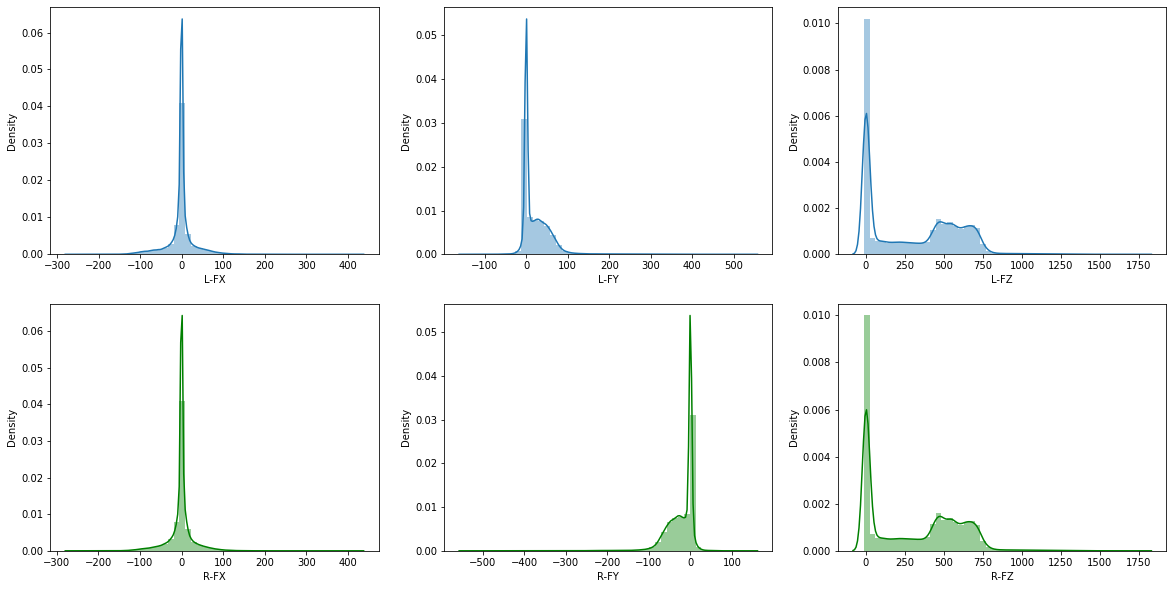

In [14]:
#histogram
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

sns.distplot(data_copy['L-FX'], ax=axes[0,0])
sns.distplot(data_copy['L-FY'], ax=axes[0,1])
sns.distplot(data_copy['L-FZ'], ax=axes[0,2])

sns.distplot(data_copy['R-FX'], ax=axes[1,0], color='g')
sns.distplot(data_copy['R-FY'], ax=axes[1,1], color='g')
sns.distplot(data_copy['R-FZ'], ax=axes[1,2], color='g')



In [17]:
#skewness and kurtosis
print("Skewness  L-FX: %f" % data_copy['L-FX'].skew())
print("Kurtosis  L-FX: %f" % data_copy['L-FX'].kurt())

#skewness and kurtosis
print("Skewness  L-FY: %f" % data_copy['L-FY'].skew())
print("Kurtosis  L-FY: %f" % data_copy['L-FY'].kurt())

#skewness and kurtosis
print("Skewness  L-FZ: %f" % data_copy['L-FZ'].skew())
print("Kurtosis  L-FZ: %f" % data_copy['L-FZ'].kurt())

#skewness and kurtosis
print("Skewness  R-FX: %f" % data_copy['R-FX'].skew())
print("Kurtosis  R-FX: %f" % data_copy['R-FX'].kurt())

#skewness and kurtosis
print("Skewness  R-FY: %f" % data_copy['R-FY'].skew())
print("Kurtosis  R-FY: %f" % data_copy['R-FY'].kurt())

#skewness and kurtosis
print("Skewness  R-FZ: %f" % data_copy['R-FZ'].skew())
print("Kurtosis  R-FZ: %f" % data_copy['R-FZ'].kurt())

Skewness  L-FX: -0.258221
Kurtosis  L-FX: 6.014982
Skewness  L-FY: 3.467494
Kurtosis  L-FY: 24.180557
Skewness  L-FZ: 0.332366
Kurtosis  L-FZ: -1.103458
Skewness  R-FX: -0.252457
Kurtosis  R-FX: 7.124321
Skewness  R-FY: -3.467494
Kurtosis  R-FY: 24.180557
Skewness  R-FZ: 0.312567
Kurtosis  R-FZ: -1.090363


In [ ]:
# --------------------------------------

In [22]:
from scipy.stats import norm, skew #for some statistics
from scipy import stats


 mu = -1.42 and sigma = 30.68



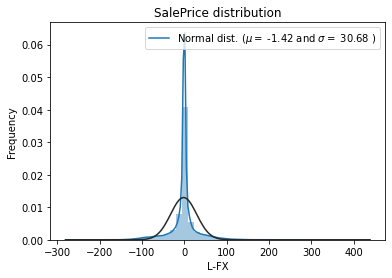

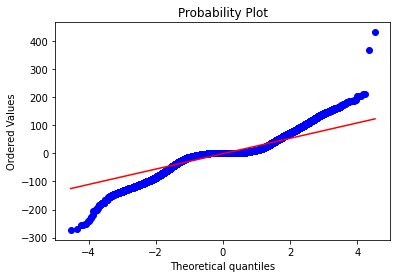

In [24]:

sns.distplot(data_copy['L-FX'] , fit=norm)
(mu, sigma) = norm.fit(data_copy['L-FX'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data_copy['L-FX'], plot=plt)
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

def tranform_data_ex(value):
    return np.log(np.abs(value) + 1)

def tranform_data(value):
    return np.sign(value) * np.log(np.abs(value) + 1)

def tranform_data_1(value):
    return np.log1p(value)

def tranform_data_2(value):
    return StandardScaler().fit_transform(value)

def normal_pdf(data, sigma, mu):
    """
    This function which use to calculate normal distribution
    :param data:  data of image root
    :param sigma: z-score for bell curve
    :param mu: mean of all data
    :return: probabilites of all pixels
    """
    pdf1 = (1 / (sigma * np.sqrt(2 * np.pi)))
    pdf2 = np.exp(-0.5 * ((data - mu) / sigma) ** 2)
    return pdf1 * pdf2



Origin Skew: 0.3323655647487377
Origin Kurost: -1.1034580070001614


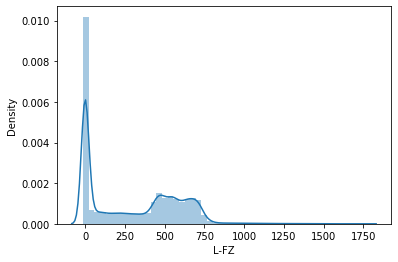

In [6]:
name_column = 'L-FZ'
sns.distplot(data_copy[name_column])
print("Origin Skew: %s" % (data_copy[name_column].skew()))
print("Origin Kurost: %s" % (data_copy[name_column].kurt()))

Origin Skew: -0.5045678000099639
Origin Kurost: -1.6171293592923575


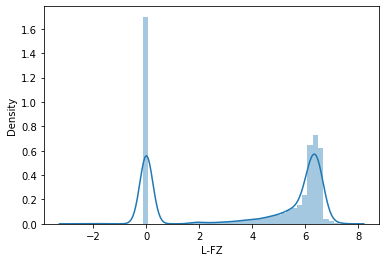

In [9]:
# transform 
data_tranformed = pd.Series(tranform_data(data_copy[name_column]))
sns.distplot(data_tranformed)
print("Origin Skew: %s" % (data_tranformed.skew()))
print("Origin Kurost: %s" % (data_tranformed.kurt()))

In [21]:
data_copy_1 = data_copy.copy()
new_data_stand = StandardScaler().fit_transform(data_copy_1)

In [27]:
new_Dataframe = pd.DataFrame(new_data_stand)

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,1.000000,0.010785,-0.046457,0.197544,-0.033507,0.010037,-0.070875,0.013462,-0.124542,0.105142,...,-0.041717,0.013284,0.008185,-0.046987,0.080186,-0.108538,-0.037597,0.028621,0.015579,-0.118303
1,0.010785,1.000000,0.328665,0.036248,0.268491,-0.500430,0.430620,0.234777,0.389749,-0.414395,...,-0.314746,0.304058,-0.072894,-0.020071,-0.083630,-0.034901,0.002262,-0.079611,-0.045854,-0.000810
2,-0.046457,0.328665,1.000000,0.000947,0.206019,-0.374031,0.173947,0.078462,0.196014,-0.279274,...,-0.245985,0.272515,-0.025843,-0.214511,-0.072647,0.015541,-0.009124,-0.040732,-0.021839,0.004897
3,0.197544,0.036248,0.000947,1.000000,-0.002053,-0.036777,0.106928,-0.001401,0.084648,-0.086077,...,0.161280,-0.175386,0.007825,0.034483,-0.047190,-0.005884,-0.100642,-0.178246,-0.042860,0.063758
4,-0.033507,0.268491,0.206019,-0.002053,1.000000,-0.630487,0.216762,0.081039,0.252458,-0.235644,...,-0.297003,0.285019,-0.023537,-0.026844,-0.106928,0.118678,-0.019692,-0.095477,-0.078243,0.039139
5,0.010037,-0.500430,-0.374031,-0.036777,-0.630487,1.000000,-0.402397,-0.155634,-0.438077,0.423611,...,0.522142,-0.510843,0.073564,0.017613,0.144378,-0.198351,0.043886,0.218611,0.135507,-0.054660
6,-0.070875,0.430620,0.173947,0.106928,0.216762,-0.402397,1.000000,0.467659,0.725357,-0.515570,...,-0.161861,0.177094,-0.003628,0.020962,-0.149772,0.147946,-0.018693,-0.129423,-0.101262,0.108282
7,0.013462,0.234777,0.078462,-0.001401,0.081039,-0.155634,0.467659,1.000000,0.417706,-0.256753,...,-0.084223,0.094195,-0.000949,-0.004892,-0.070120,0.068193,0.017701,-0.078324,-0.046684,0.051931
8,-0.124542,0.389749,0.196014,0.084648,0.252458,-0.438077,0.725357,0.417706,1.000000,-0.576663,...,-0.195418,0.220791,-0.029679,-0.007111,-0.165729,0.224173,0.028382,-0.176035,-0.119867,0.138709
9,0.105142,-0.414395,-0.279274,-0.086077,-0.235644,0.423611,-0.515570,-0.256753,-0.576663,1.000000,...,0.205712,-0.210577,0.034204,0.006618,0.144826,-0.192172,-0.020582,0.183324,0.128000,-0.119857


In [12]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([
        ('somename', StandardScaler(), [name_column])
    ], remainder='passthrough')

axxx = ct.fit_transform(data_copy)
data_copy_1 = pd.DataFrame(axxx)


Origin Skew: 0.332365564748738
Origin Kurost: -1.103458007000159


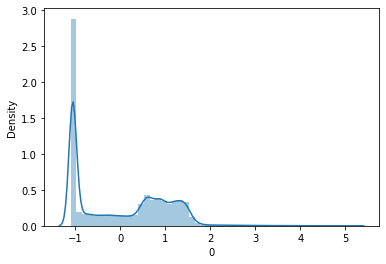

In [13]:
# transform 
sns.distplot(data_copy_1[0])
print("Origin Skew: %s" % (data_copy_1[0].skew()))
print("Origin Kurost: %s" % (data_copy_1[0].kurt()))


 mu = 1.67 and sigma = 1.74



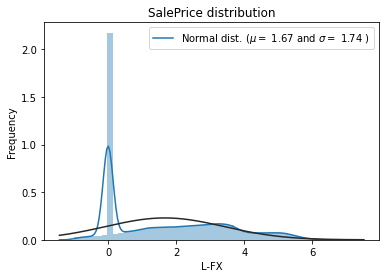

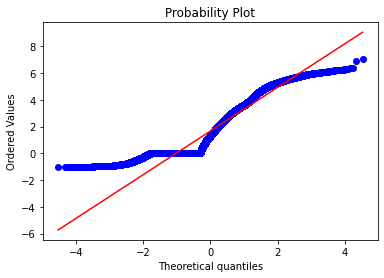

In [136]:
sns.distplot(a, fit=norm)
(mu, sigma) = norm.fit(a)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(a, plot=plt)
plt.show()

In [52]:
xxx = pd.DataFrame({'Name' : [3, 4,6], 'Age' : [18, 92,98], 'Weight' : [68, 59,49]})

col_names = ['Name', 'Age', 'Weight']
features_xxx = xxx[col_names]

In [53]:
features_xxx

,Name,Age,Weight
0,3,18,68
1,4,92,59
2,6,98,49


In [86]:
data_copy['L-FY']

0          0.00
1          0.00
2          0.00
3          0.00
4          0.00
          ...  
236383    77.15
236384    77.56
236385    79.80
236386    81.44
236387    85.35
Name: L-FY, Length: 236388, dtype: float64

In [93]:
from scipy.stats import boxcox, shapiro
my_df = pd.DataFrame({'A' : [0.1,0.15,0.22,0.2], 'B' : [0.9,0.85,0.78,0.8]})
df_norm = my_df.apply(lambda x: boxcox(x)[0])
print(df_norm)

          A         B
0 -0.660612 -0.134124
1 -0.641490 -0.237600
2 -0.609405 -0.451641
3 -0.619138 -0.379958


<AxesSubplot:ylabel='Density'>

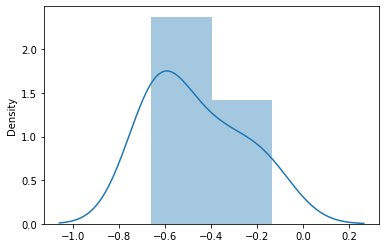

In [94]:
sns.distplot(df_norm)

<AxesSubplot:ylabel='Density'>

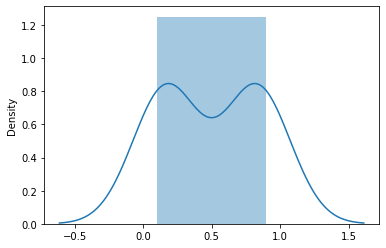

In [95]:
sns.distplot(my_df)

In [96]:
data_copy.describe()

,L-FX,L-FY,L-FZ,R-FX,R-FY,R-FZ,L-Fx1,L-Fy1,L-Fz1,L-Mx1,...,R-Fz3,R-Mx3,R-My3,R-Mz3,R-AccelX,R-AccelY,R-AccelZ,R-GyroX,R-GyroY,R-GyroZ
count,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,...,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000,236388.000000
mean,-1.418075,22.114680,298.793611,-1.300807,-22.114680,302.957281,62.012641,25.433141,138.041484,-50.307369,...,167.814836,-49.059797,4.437006,-0.411473,-0.011716,0.205985,1.023005,-5.576232,-3.760600,0.407934
std,30.683384,35.378709,282.987488,28.530326,35.378709,282.964398,108.512381,93.233803,224.987411,89.809899,...,246.634563,71.264729,37.332834,81.267939,0.296547,0.644761,0.530022,112.689013,46.868387,38.868049
min,-272.500000,-152.750000,-11.820000,-272.500000,-548.470000,-11.820000,-706.551020,-1369.960000,-623.895833,-1133.060000,...,-58.265306,-682.270833,-265.860000,-695.740000,-15.370000,-9.780000,-8.760000,-753.410000,-647.800000,-459.400000
25%,-4.910000,0.000000,0.000000,-4.820000,-38.650000,0.000000,0.080000,-4.020000,5.877551,-82.180000,...,-0.204082,-85.560000,-4.520833,-22.666667,-0.030000,0.050000,0.950000,-6.300000,-8.960000,-5.600000
50%,0.000000,6.430000,273.370000,0.000000,-6.430000,291.465000,18.660000,5.469388,47.642917,-14.591837,...,29.777755,-12.940000,0.081633,-0.940000,0.010000,0.070000,0.980000,0.700000,-0.910000,-0.100000
75%,3.340000,38.650000,550.910000,3.860000,0.000000,551.970000,91.940000,33.780000,178.489796,1.204082,...,278.944082,0.300000,6.653061,17.120000,0.060000,0.250000,1.030000,7.560000,6.400000,5.200000
max,430.640000,548.470000,1758.640000,430.640000,152.750000,1758.640000,2023.770833,1731.591837,2056.081633,569.612245,...,2036.541667,850.638298,860.520833,974.895833,7.730000,15.980000,15.410000,720.020000,790.700000,426.300000


In [101]:
import statistics
x_axis = np.arange(-20, 20, 0.01)
  
# Calculating mean and standard deviation
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)

print(f"{mean} - {sd}")

-0.0049999999968743936 - 11.54844866926759


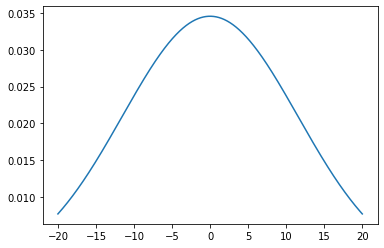

In [102]:
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.show()

In [128]:
# Calculating mean and standard deviation
mean = statistics.mean(data_copy['L-FY'])
sd = statistics.stdev(data_copy['L-FY'])

print(f"{mean} - {sd}")

22.11468044768206 - 35.378708602663195


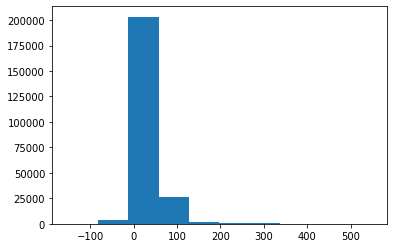

In [130]:
plt.hist(data_copy['L-FY'])
plt.show()

In [131]:
y_data = stats.norm.pdf(data_copy['L-FY'], mean, sd)

(array([  5430.,   2657.,   3669.,   5200.,   6665.,   8625.,  12007.,
         21215., 111199.,  59721.]),
 array([9.71021885e-51, 1.12763380e-03, 2.25526760e-03, 3.38290141e-03,
        4.51053521e-03, 5.63816901e-03, 6.76580281e-03, 7.89343661e-03,
        9.02107042e-03, 1.01487042e-02, 1.12763380e-02]),
 <BarContainer object of 10 artists>)

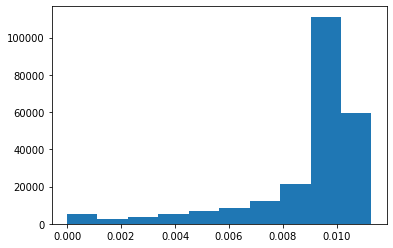

In [132]:
plt.hist(y_data)

<AxesSubplot:ylabel='Density'>

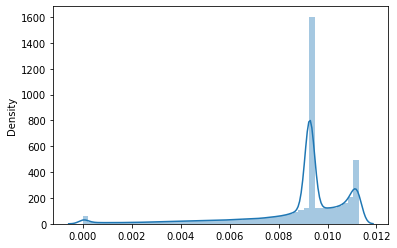

In [133]:
sns.distplot(y_data)

In [124]:
print("Skewness  L-FX: %f" % y_data.skew())
print("Kurtosis  L-FX: %f" % y_data.kurt())

AttributeError: 'numpy.ndarray' object has no attribute 'skew'

<AxesSubplot:xlabel='L-FX', ylabel='Density'>

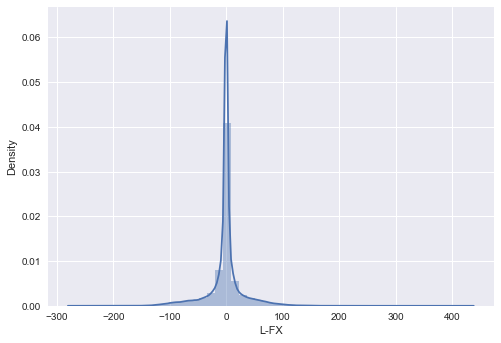

In [140]:
from scipy.stats import boxcox

sns.distplot(data_copy['L-FX'])

<AxesSubplot:xlabel='L-FX', ylabel='Density'>

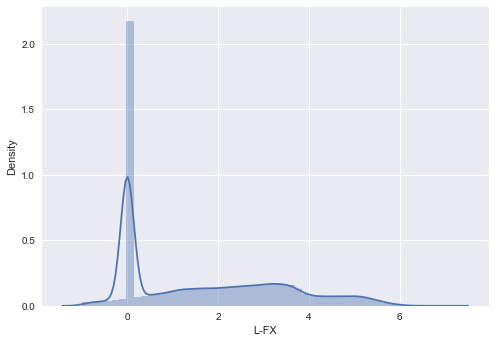

In [144]:
data_tranformed = tranform_data(data_copy['L-FX'])

sns.distplot(data_tranformed)

In [253]:
def x_normalization(value, min_value, max_value):
    return (value - min_value) / (max_value - min_value)
    
def x1_normalization(value, mean, sigma):
    return (value - mean) / sigma

In [270]:
from scipy.special import boxcox1p, boxcox

data_boxcox = np.exp(tranform_data_ex(data_copy['L-FZ']))
data_boxcox_a = np.log1p(data_copy['L-FZ'])

In [258]:
normalized = x_normalization(data_copy['L-FY'], 
                min(data_copy['L-FY']),
                max(data_copy['L-FY']))

In [264]:
normalized = x1_normalization(data_copy['L-FZ'], 
                np.mean(data_copy['L-FZ']),
                np.std(data_copy['L-FZ']))

ValueError: supplied range of [7.355957712112049e-06, inf] is not finite

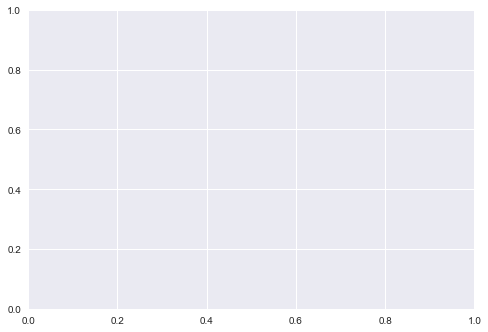

In [271]:
plt.hist(data_boxcox_a)

<AxesSubplot:xlabel='L-FZ', ylabel='Density'>

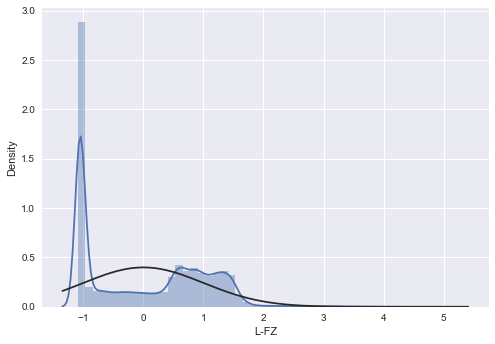

In [265]:
sns.distplot(normalized, fit=norm)

In [237]:
pdf_databoxcox = boxcox(data_boxcox_a, 0)

In [239]:
pdf_databoxcox = norm.pdf(data_boxcox_a)

<AxesSubplot:ylabel='Density'>

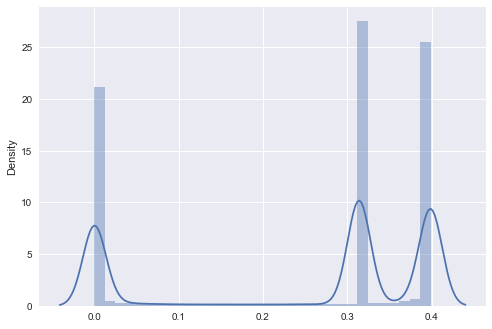

In [240]:
sns.distplot(pdf_databoxcox)

In [242]:
StandardScaler().fit_transform(data_copy['L-FX'])

ValueError: Expected 2D array, got 1D array instead:
array=[  0.     0.     0.   ... -29.05 -40.25 -50.44].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
##### - ------------- Test 1 số thứ ------

In [37]:
all_data_na = (data_copy.isnull().sum() / len(data_copy)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio


<AxesSubplot:>

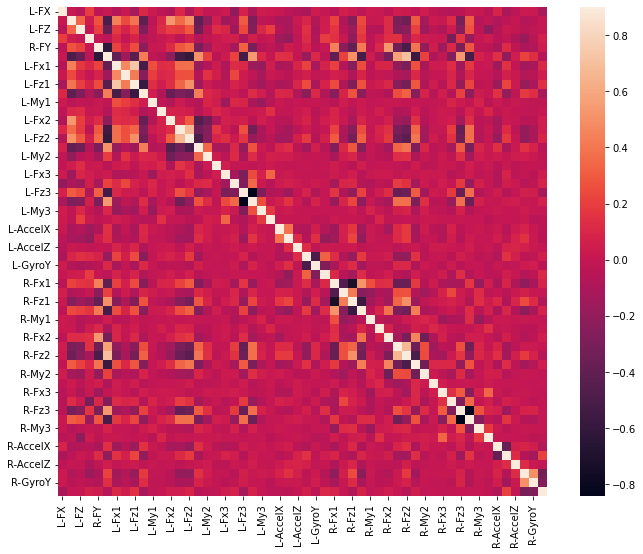

In [38]:
corrmat = data_copy.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [14]:
data_copy = data.copy()
data_copy.rename(columns={'Unnamed: 0': 'datecheck-ID', 
                          'Unnamed: 1': 'shoes-ID',
                          'Unnamed: 2': 'balance-status',
                          'データＩＤ':'set-ID',
                         }, inplace = True)

# Task 3: removing feature which relate to train
data_copy = drop_column(df=data_copy)

In [15]:
from scipy.stats import norm, skew, kurtosis #for some statistics

numeric_feats = data_copy.dtypes[data_copy.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = data_copy[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
kurt_feats = data_copy[numeric_feats].apply(lambda x: kurtosis(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats, 'Kurt': kurt_feats})
skewness


Skew in numerical features: 



,Skew,Kurt
L-AccelX,1.976790,84.439148
L-AccelY,3.249185,40.291028
L-AccelZ,3.503865,48.698887
L-FX,-0.258219,6.014829
L-FY,3.467472,24.180020
L-FZ,0.332363,-1.103460
L-Fx1,4.106744,33.898972
L-Fx2,1.918963,39.043507
L-Fx3,-1.448498,26.436793
L-Fy1,2.127239,29.046468


In [12]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    data_copy[feat] = boxcox1p(data_copy[feat], lam)


There are 54 skewed numerical features to Box Cox transform


In [65]:
data_copy = StandardScaler().fit_transform(data_copy)

In [66]:
data_copy = pd.DataFrame(data_copy)

In [54]:
from scipy.stats import norm, skew #for some statistics

numeric_feats = data_copy.dtypes[data_copy.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = data_copy[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
17,11.735352
46,4.973235
6,4.106744
50,3.503865
26,3.503865
1,3.467472
49,3.249185
25,3.249185
32,3.180521
8,3.180521


In [55]:
data_copy

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0.046216,-0.625086,-1.055857,0.440964,-0.897302,0.964091,-0.520163,-0.223998,-0.601004,0.557535,...,0.255776,-0.341662,0.384620,0.740350,0.106950,-0.210908,-0.100006,0.057559,0.014522,-0.095141
1,0.046216,-0.625086,-1.055857,0.281484,-0.878364,0.972325,-0.612319,-0.288352,-0.601004,0.546401,...,0.194957,-0.285533,0.384620,0.715740,0.106950,-0.195398,-0.081139,0.057559,0.016015,-0.095141
2,0.046216,-0.625086,-1.055857,0.120602,-0.822398,0.993105,-0.538594,-0.309804,-0.609893,0.557535,...,0.146302,-0.313597,0.384620,0.703435,0.106950,-0.195398,-0.081139,0.060044,0.014522,-0.098743
3,0.046216,-0.625086,-1.055857,-0.152091,-0.830878,0.992610,-0.557025,-0.266901,-0.596559,0.579805,...,0.069265,-0.215372,0.384620,0.580385,0.106950,-0.195398,-0.081139,0.065013,0.019002,-0.096942
4,0.046216,-0.625086,-1.055857,-0.170317,-0.832574,0.999042,-0.603103,-0.331255,-0.601004,0.579805,...,0.000337,-0.173275,0.250689,0.506555,0.106950,-0.195398,-0.081139,0.065013,0.024976,-0.100544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236383,-0.488928,1.555609,0.921514,0.045594,0.625086,-1.070657,0.673183,1.554965,1.364702,-1.001650,...,-0.675555,0.671298,-0.135993,-0.046864,-0.331430,-0.490081,0.277338,-2.233796,-3.026341,0.591543
236384,-0.577249,1.567198,0.958901,0.045594,0.625086,-1.070657,0.802201,1.651497,1.604716,-1.124132,...,-0.679609,0.699363,-0.135993,-0.009949,-0.129101,-0.272946,0.635815,-2.385542,-3.399727,-0.056806
236385,-0.900552,1.630513,0.996995,0.045594,0.625086,-1.070657,0.958866,1.769480,1.858064,-1.257747,...,-0.679609,0.671298,-0.109207,0.002356,-0.129101,-0.102340,1.126362,-2.453871,-3.809386,-0.128845
236386,-1.265571,1.676869,1.059188,0.045594,0.625086,-1.070657,1.207686,1.844560,2.160304,-1.346825,...,-0.683664,0.727427,-0.135993,0.014661,-0.365151,0.207853,1.579174,-2.449434,-3.945939,0.370281


In [71]:
all_data = pd.get_dummies(data_copy)
print(all_data.shape)

(236388, 54)
